In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv(r'C:\Users\uddha\OneDrive\Desktop\Datasets\Titanic\train.csv')
test_data = pd.read_csv(r'C:\Users\uddha\OneDrive\Desktop\Datasets\Titanic\test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
train_data = train_data.drop(columns = ['Cabin'])
test_data = test_data.drop(columns = ['Cabin'])

In [8]:
train_data['Age'].fillna(train_data['Age'].median(), inplace = True)

In [9]:
test_data['Age'].fillna(test_data['Age'].median(), inplace = True)

In [10]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace = True)

In [11]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
#the columns name and ticket dont offer much value to analysis so i'm dropping them
train_data = train_data.drop(columns = ['Name', 'Ticket'])
test_data = test_data.drop(columns = ['Name', 'Ticket'])

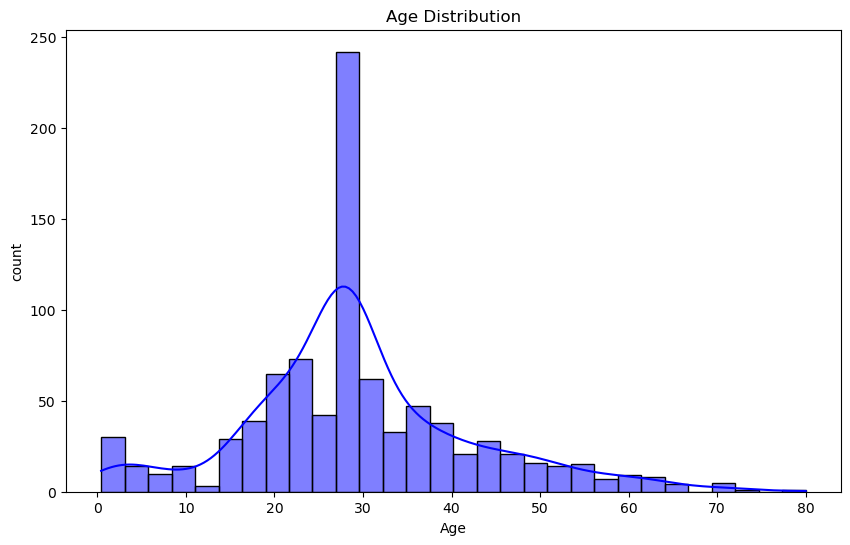

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(train_data['Age'],kde=True,color='blue') 
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

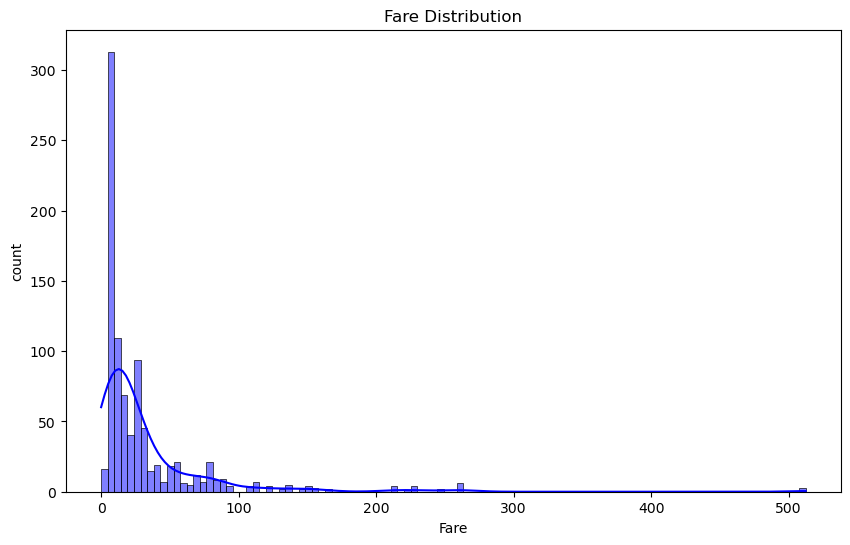

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(train_data['Fare'],kde=True,color='blue') 
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('count')
plt.show()

In [16]:
#need to perform scaling on fare
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [17]:
scaler = StandardScaler()
train_data['Fare'] = scaler.fit_transform(train_data[['Fare']])

In [18]:
scaler = StandardScaler()
test_data['Fare'] = scaler.fit_transform(test_data[['Fare']])

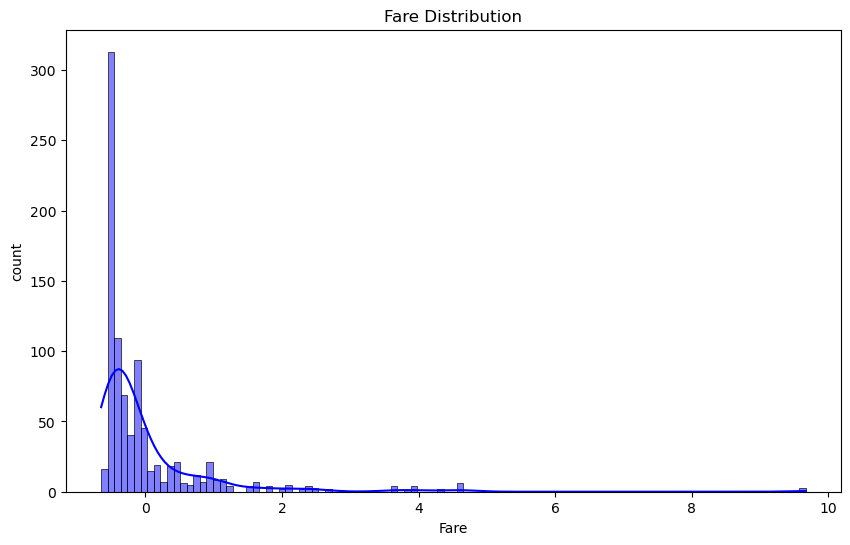

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(train_data['Fare'],kde=True,color='blue') 
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('count')
plt.show()

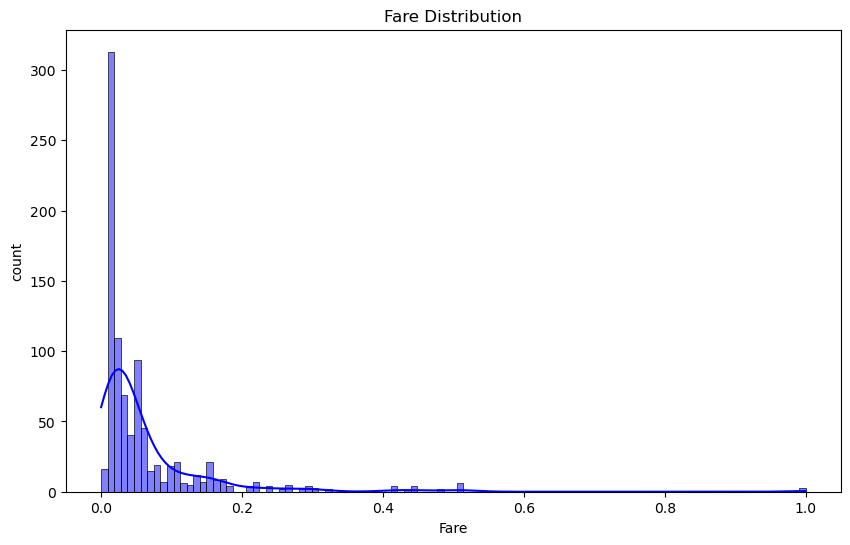

In [20]:
#Scaling Fare variable in Train data
scaler = MinMaxScaler()
train_data['Fare'] = scaler.fit_transform(train_data[['Fare']])

plt.figure(figsize=(10,6))
sns.histplot(train_data['Fare'],kde=True,color='blue') 
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('count')
plt.show()

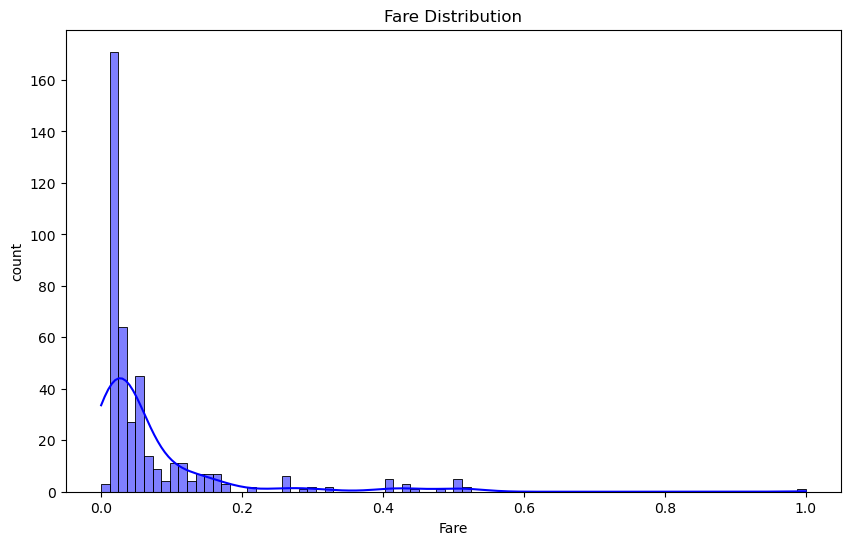

In [51]:
#Scaling Fare variable in Test data
scaler = MinMaxScaler()
test_data['Fare'] = scaler.fit_transform(test_data[['Fare']])

plt.figure(figsize=(10,6))
sns.histplot(test_data['Fare'],kde=True,color='blue') 
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('count')
plt.show()

In [21]:
print(test_data.head(5))
print("------------------------------")
print(train_data.head(5))

   PassengerId  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0          892       3    male  34.5      0      0 -0.497413        Q
1          893       3  female  47.0      1      0 -0.512278        S
2          894       2    male  62.0      0      0 -0.464100        Q
3          895       3    male  27.0      0      0 -0.482475        S
4          896       3  female  22.0      1      1 -0.417492        S
------------------------------
   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch      Fare  \
0            1         0       3    male  22.0      1      0  0.014151   
1            2         1       1  female  38.0      1      0  0.139136   
2            3         1       3  female  26.0      0      0  0.015469   
3            4         1       1  female  35.0      1      0  0.103644   
4            5         0       3    male  35.0      0      0  0.015713   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S  


In [22]:
encoder = LabelEncoder()
#Transforming Sex column male = 1 and female = 0
train_data['Sex'] = encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = encoder.fit_transform(test_data['Sex'])

In [23]:
#Transforming Embarked Column Q = 1, S= 2, C=0
train_data['Embarked'] = encoder.fit_transform(train_data['Embarked'])
test_data['Embarked'] = encoder.fit_transform(test_data['Embarked'])

In [55]:
print(test_data.head(5))
print("------------------------------")
print(train_data.head(5))

   PassengerId  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0          892       3    1  34.5      0      0  0.015282         1
1          893       3    0  47.0      1      0  0.013663         2
2          894       2    1  62.0      0      0  0.018909         1
3          895       3    1  27.0      0      0  0.016908         2
4          896       3    0  22.0      1      1  0.023984         2
------------------------------
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0            1         0       3    1  22.0      1      0  0.014151         2
1            2         1       1    0  38.0      1      0  0.139136         0
2            3         1       3    0  26.0      0      0  0.015469         2
3            4         1       1    0  35.0      1      0  0.103644         2
4            5         0       3    1  35.0      0      0  0.015713         2


In [24]:
from sklearn.model_selection import train_test_split


X = train_data.drop(columns = 'Survived', axis = 1)
y = train_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [25]:
print(X.head(5))

   PassengerId  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0            1       3    1  22.0      1      0  0.014151         2
1            2       1    0  38.0      1      0  0.139136         0
2            3       3    0  26.0      0      0  0.015469         2
3            4       1    0  35.0      1      0  0.103644         2
4            5       3    1  35.0      0      0  0.015713         2


# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score,f1_score,recall_score

model_lr = LogisticRegression(max_iter = 500)

model_lr.fit(X_train, y_train) 

#predicting y
y_test_pred_lr = model_lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision score: ", precision_score(y_test,y_test_pred))
print("F1 score: ", f1_score(y_test,y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy: 0.8097014925373134
Precision score:  0.7941176470588235
F1 score:  0.7605633802816901
Confusion Matrix:
 [[136  21]
 [ 30  81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



# Gradient boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(random_state= 42)

model_gb.fit(X_train, y_train)

#predicting y

y_test_pred_gb = model_gb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_test_pred_gb))
print("Precision score: ", precision_score(y_test,y_test_pred_gb))
print("F1 score: ", f1_score(y_test,y_test_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_test_pred_gb))

Accuracy: 0.8059701492537313
Precision score:  0.8390804597701149
F1 score:  0.7373737373737373
Confusion Matrix:
 [[143  14]
 [ 38  73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       157
           1       0.84      0.66      0.74       111

    accuracy                           0.81       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268



# Random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier()

model_rfc.fit(X_train, y_train)

#predicting y

y_test_pred_rfc = model_rfc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_test_pred_rfc))
print("Precision score:", precision_score(y_test, y_test_pred_rfc))
print("F1 score: ", f1_score(y_test,y_test_pred_rfc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rfc))
print("Classification Report:\n", classification_report(y_test, y_test_pred_rfc))

Accuracy: 0.8097014925373134
Precision score: 0.8260869565217391
F1 score:  0.7487684729064039
Confusion Matrix:
 [[141  16]
 [ 35  76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.83      0.68      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



# Out of the 3 models Random forest classifer works well because it has better accuracy score 